In [1]:
#Importing necessary packages

import pandas as pd
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [2]:
#Load the movielens-100k dataset "ml-100k"

#Step 1 - Data Preparation

#Reading movielens data from 
#https://grouplens.org/datasets/movielens/

#data = pd.read_csv('E:/datafiles/ml-100k/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])
#data.head()

data = Dataset.load_builtin('ml-100k')

In [3]:
data

In [4]:
#Dividing the data into train test split

trainset, testset = train_test_split(data, test_size = 20)

In [5]:
#Initializing the SVD algorithm

model = SVD()

#Fitting the model
model.fit(trainset)

In [6]:
#Make the predictions

predictions = model.test(testset)

In [7]:
#computing the error(RMSE in this case)

accuracy.rmse(predictions)

RMSE: 0.8265


0.8264667383997698

In [8]:
#Predicting rating for a user for a movie

uid = str(456) #row user id(as in the rating file)
iid = str(131) #row user id(as in the rating file)

#get a prediction for specific users and items

pred = model.predict(uid,iid)

In [9]:
#view predicting rating

#if est (estimated)  rating comes high we can recommended a specific movie to the user

#Note:- we can also use KNN,FASTAI approaches for model based collabrative filters

pred.est

3.6960261069013396

In [10]:
#Initializing the NMF algorithm

from surprise import NMF
model = NMF()

#Fitting the model
model.fit(trainset)

In [11]:
#Make the predictions

predictions = model.test(testset)

In [12]:
#computing the error(RMSE in this case)

accuracy.rmse(predictions)

RMSE: 0.9772


0.9772226374140378

In [13]:
#Predicting rating for a user for a movie

uid = str(456) #row user id(as in the rating file)
iid = str(131) #row user id(as in the rating file)

#get a prediction for specific users and items

pred = model.predict(uid,iid)

In [14]:
#view predicting rating

#if est (estimated)  rating comes high we can recommended a specific movie to the user

#Note:- we can also use KNN,FASTAI approaches for model based collabrative filters

pred.est

3.6415402186498307

In [15]:
#Initializing the NMF algorithm

from surprise import KNNBasic
model = KNNBasic()

#Fitting the model
model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [16]:
#Make the predictions

predictions = model.test(testset)

In [17]:
#computing the error(RMSE in this case)

accuracy.rmse(predictions)

RMSE: 1.0723


1.0722506914223853

In [18]:
#Predicting rating for a user for a movie

uid = str(456) #row user id(as in the rating file)
iid = str(131) #row user id(as in the rating file)

#get a prediction for specific users and items

pred = model.predict(uid,iid)

In [19]:
#view predicting rating

#if est (estimated)  rating comes high we can recommended a specific movie to the user

#Note:- we can also use KNN,FASTAI approaches for model based collabrative filters

pred.est

3.917575599546307

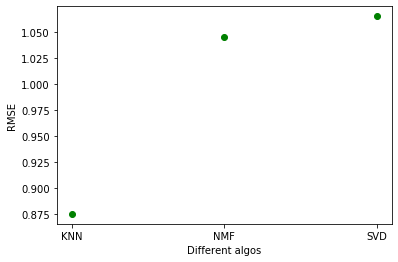

In [20]:
import matplotlib.pyplot as plt

RMSE = [0.875,1.045,1.065]
algos = ['KNN', "NMF", 'SVD']
plt.plot(algos, RMSE, 'go',  )
plt.xlabel("Different algos")
plt.ylabel("RMSE")
plt.show()